In [140]:
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [181]:
# This data is formatted atrociously. So lots of these operations are cleaning things up in pandas

In [182]:
data_dir = "../data/dayflow/"
files = [os.path.join(data_dir,x) for x in os.listdir(data_dir) if "wy" not in x]
years = range(1997, 2019)

In [183]:
dfs= []
for i in sorted(files):
    print(i)

    if not "2017" in i:
        df = pd.read_csv(i)
        idx = df.index.get_loc('monthly totals')
        out = df[idx+2:]
        out.index = [10,11,12,1,2,3,4,5,6,7,8,9]
        out.drop("X2", axis =1, inplace = True)
        dfs.append(out)
    else:
        a = pd.read_csv(i)
        a.set_index(a.columns[0])
        idx = df.index.get_loc('monthly totals')
        out = df[idx+2:]
        out.index = [10,11,12,1,2,3,4,5,6,7,8,9]
        out.drop("X2", axis = 1, inplace = True)
        dfs.append(out)

../data/dayflow/dayflowCalculations1997.csv
../data/dayflow/dayflowCalculations1998.csv
../data/dayflow/dayflowCalculations1999.csv
../data/dayflow/dayflowCalculations2000.csv
../data/dayflow/dayflowCalculations2001.csv
../data/dayflow/dayflowCalculations2002.csv
../data/dayflow/dayflowCalculations2003.csv
../data/dayflow/dayflowCalculations2004.csv
../data/dayflow/dayflowCalculations2005.csv
../data/dayflow/dayflowCalculations2006.csv
../data/dayflow/dayflowCalculations2007.csv
../data/dayflow/dayflowCalculations2008.csv
../data/dayflow/dayflowCalculations2009.csv
../data/dayflow/dayflowCalculations2010.csv
../data/dayflow/dayflowCalculations2011.csv
../data/dayflow/dayflowCalculations2012x_10-25-2013.csv
../data/dayflow/dayflowCalculations2013x_2-20-2015.csv
../data/dayflow/dayflowCalculations2014a_9-24-2015.csv
../data/dayflow/dayflowCalculations2015-05-31-2017.csv
../data/dayflow/dayflowCalculations2016.csv
../data/dayflow/dayflowCalculations2017.csv
../data/dayflow/dayflowCalculat

In [228]:
data = {}

for i,x in enumerate(years):
    df = dfs[i]
    df2 = df.rename(index=str, columns={"Year": "DIVER", "Mo": "EFFEC", "Date": "EFFDIV"})
    df2.drop(df.columns[-3:], axis = 1, inplace = True)
    df2['year'] = x
    df2['month'] = df2.index
    df2['day'] = -1
#     df2.index = pd.date_range(, periods = 12, freq ='M') 
    data[x] = df2


/Users/aakash/anaconda3/envs/gis/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


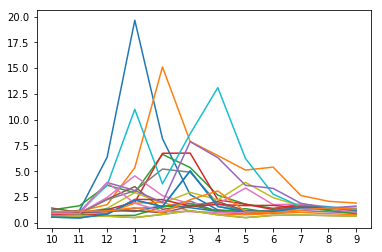

In [239]:
for k,v in data.items():
    plt.plot(v.OUT.convert_objects(convert_numeric=True) * 1.23348e-6)